In [37]:
import pandas as pd
import geopandas as gpd
import contextily as cx
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from shapely.geometry import Point, LineString, MultiLineString, Polygon
plt.style.use(['classic'])
geojson = 'GeoJSON'

In [38]:
mesh = gpd.read_file('../../data/2019/mesh500/HDDSWH5339/MESH05339.shp', crs=6668).to_crs(2451)

array('d', [-75188.81034767757, -75757.00108741024, -75753.11240976886, -75184.95084125925, -75188.81034767757])
array('d', [-73647.29503978923, -73642.5332880143, -73180.28514912556, -73185.04714486256, -73647.29503978923])


<AxesSubplot:>

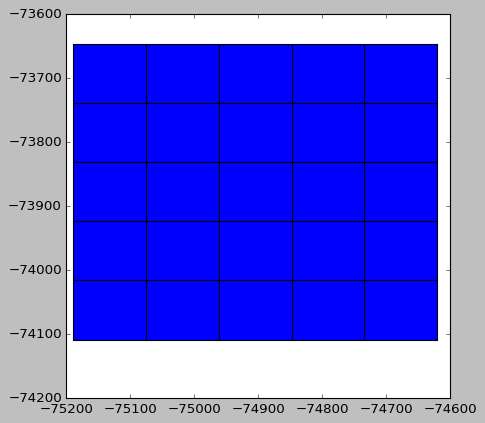

In [40]:
geoms = []
xarray, yarray = mesh.geometry[0].exterior.coords.xy
print(xarray)
print(yarray)
xlen, ylen = (xarray[0] - xarray[1]) / 5, (yarray[2] - yarray[1]) / 5
for x in range(5):
    for y in range(5):
        geoms.append(Polygon([
            (xarray[0] + xlen * x, yarray[0] - ylen * y),
            (xarray[0] + xlen * (x+1), yarray[0] - ylen * y),
            (xarray[0] + xlen * (x+1), yarray[0] - ylen * (y+1)),
            (xarray[0] + xlen * x, yarray[0] - ylen * (y+1)),
            (xarray[0] + xlen * x, yarray[0] - ylen * y)
    ]))
df = gpd.GeoDataFrame([None for x in range(25)], geometry=geoms)
df.plot()

In [52]:
kokusei = pd.DataFrame()
for x in mesh.MESH1_ID.unique():
    kokusei = pd.concat([kokusei,
        pd.read_csv(f"../data/2019/kokutyou500/tblT000847H{x}.txt", encoding='sjis', skiprows=[1])])
kokusei = kokusei[['KEY_CODE', 'T000847001']]
kokusei.columns = ['KEY_CODE', 'people']
kokusei.KEY_CODE = kokusei.KEY_CODE.astype(str)
kokusei = pd.merge(mesh[['KEY_CODE', 'geometry']], kokusei, on='KEY_CODE')
kokusei['area_t'] = kokusei.area

In [53]:
keizai = pd.DataFrame()
for x in mesh.MESH1_ID.unique():
    keizai = pd.concat([keizai,
        pd.read_csv(f"../data/2019/keizai500/tblT000389H{x}.txt", encoding='sjis', skiprows=[1])])
keizai.columns = ['KEY_CODE', 'company', 'people']
keizai.KEY_CODE = keizai.KEY_CODE.astype(str)
keizai = pd.merge(mesh, keizai, on='KEY_CODE')
keizai['area_t'] = keizai.area

In [54]:
stations = gpd.read_file('../data/railway/ekidata.geojson', crs=4326).to_crs(2451)

In [55]:
tokyoeki = stations[stations.station_name.str.contains('東京')].geometry.values[0]